In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

fatal: cannot change to '/Users/rounaksarkar/Documents/GitHub/coco_128_analysis/COCO': No such file or directory
YOLOv5 🚀 2023-6-27 Python-3.11.4 torch-2.0.0 CPU


Setup complete ✅ (8 CPUs, 8.0 GB RAM, 206.8/228.3 GB disk)


In [2]:
!bash data/scripts/get_coco128.sh

######################################################################## 100.0%                                                    0.5%                                                        3.8%
replace ../datasets/coco128/LICENSE? [y]es, [n]o, [A]ll, [N]one, [r]ename:  NULL
(EOF or read error, treating as "[N]one" ...)


The coco128 is a subset of the coco dataset. It contains 128 images and 80 classes. The images are of different sizes and the classes are not evenly distributed. For full data download use the command
`!bash data/scripts/get_coco.sh`

In [3]:
import torch
from IPython.display import Image, clear_output  # to display images

In [4]:
from torchvision.datasets import CocoDetection
from torchvision.datasets import ImageFolder
from torchvision.transforms import transforms
import matplotlib.pyplot as plt

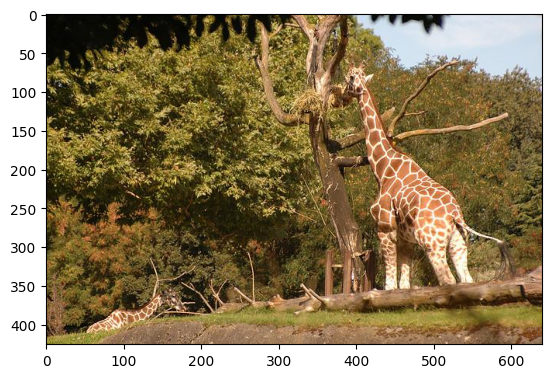

In [5]:
import matplotlib.image as img
testImage = img.imread("/Users/rounaksarkar/Desktop/ML:AI/4. Computer Vision/COCO dataset analysis with Pytorch/datasets/coco128/images/train2017/000000000025.jpg")
plt.imshow(testImage)

## Data Preparation

### Data Augmentation

In [6]:
try:
    import albumentations
except ImportError:
    %pip install albumentations --upgrade

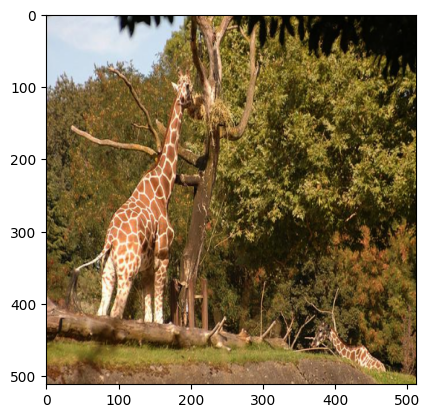

In [7]:
# Data augmentation
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2

transform = A.Compose([ A.Resize(512,512),  # resize the image
                        A.HorizontalFlip(p=0.5),  # horizontal flip
                        A.VerticalFlip(p=0.1),  # Vertical flip
                        A.RandomBrightnessContrast(p=0.2),  # random brightness & contrast
                        A.RandomGamma(p=0.2),  # random gamma
                        A.Normalize(mean=[0, 0, 0], std=[1, 1, 1]),  # normalize
                        ToTensorV2(),  # convert to tensor
])

transformed = transform(image=testImage)
plt.imshow(transformed['image'].permute(1,2,0))